In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Importando o arquivo
df = pd.read_csv("card_transdata.csv")

# Exibir as primeiras linhas da base
df.head()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [9]:
# verifica os valores nulos
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [14]:
# Conferindo o tipo das variaveis
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                     int64
used_chip                           int64
used_pin_number                     int64
online_order                        int64
fraud                               int64
dtype: object

In [15]:
# resumo estatístico
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# tratamento dos dados
# passar as variaveis repeat_retailer, used_chip, used_pin_number, online_order, fraud para int
cols_to_convert = ["repeat_retailer", "used_chip", "used_pin_number", "online_order", "fraud"]

# Convertendo para inteiro
df[cols_to_convert] = df[cols_to_convert].astype(int)

# Conferindo o resultado
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                     int64
used_chip                           int64
used_pin_number                     int64
online_order                        int64
fraud                               int64
dtype: object

In [16]:
# Exibir as primeiras linhas da base
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


## Análise e distribuição das variáveis

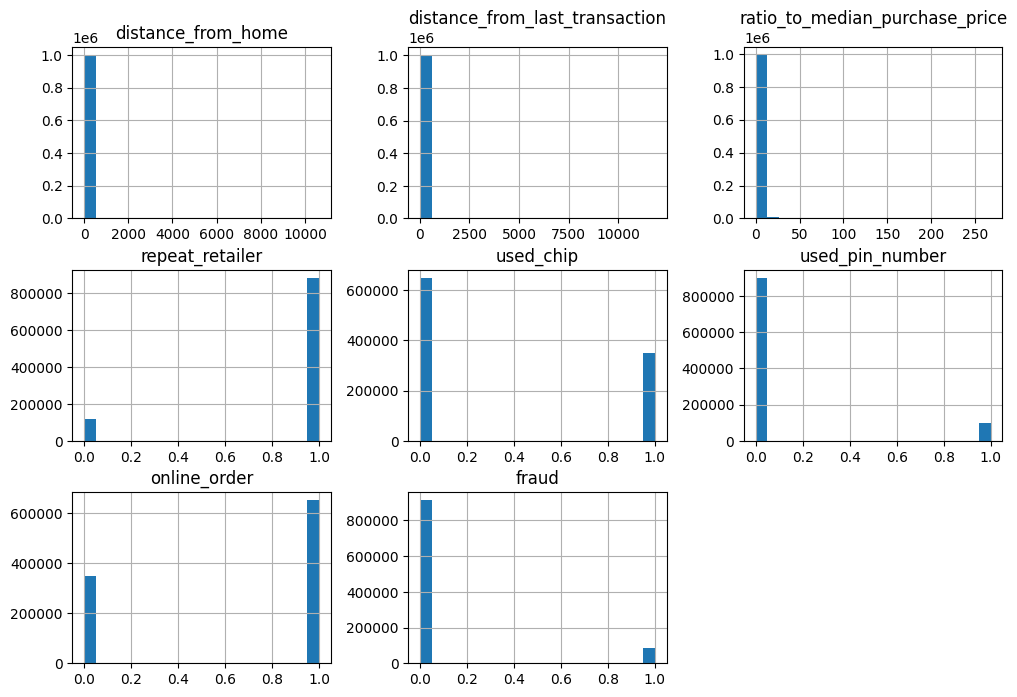

In [13]:
df.hist(figsize=(12, 8), bins=20)
plt.show()


## Correlação Entre as Variáveis

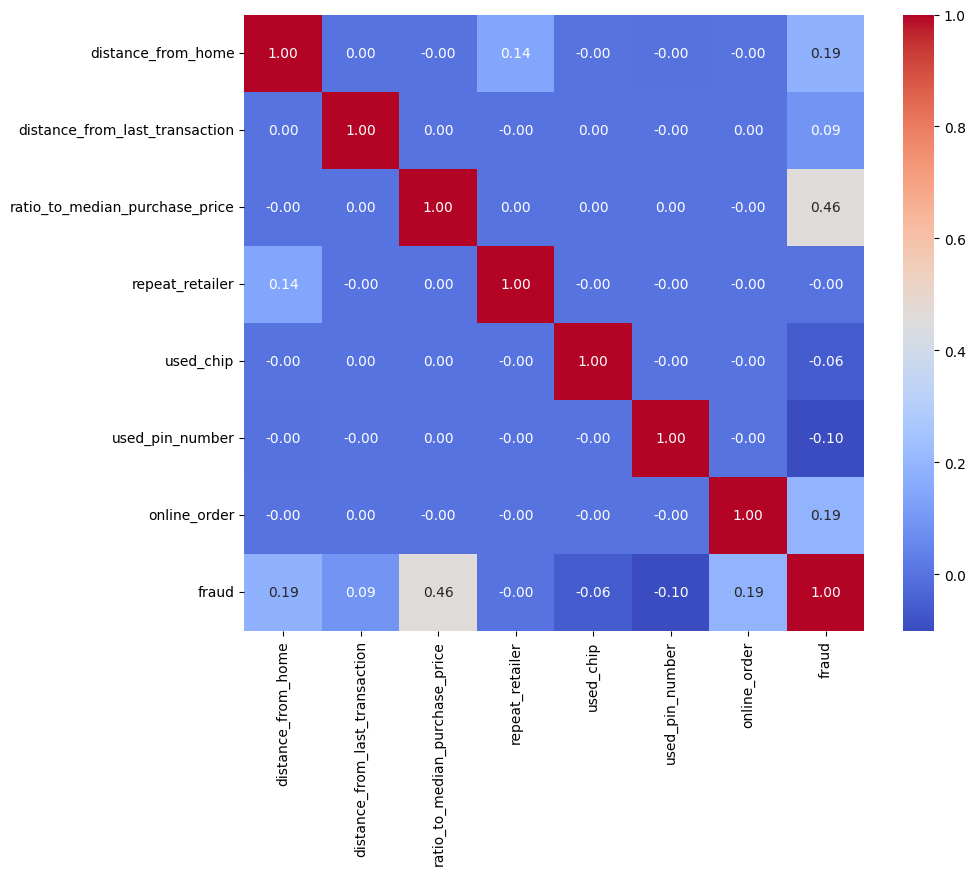

In [17]:

# Criando a matriz de correlação
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [18]:
# Ordenando as correlações com a variável alvo (fraud)
correlation_with_target = correlation_matrix["fraud"].sort_values(ascending=False)
print(correlation_with_target)

fraud                             1.000000
ratio_to_median_purchase_price    0.462305
online_order                      0.191973
distance_from_home                0.187571
distance_from_last_transaction    0.091917
repeat_retailer                  -0.001357
used_chip                        -0.060975
used_pin_number                  -0.100293
Name: fraud, dtype: float64


## Comparando as Variáveis com o Alvo

In [33]:
df.groupby('fraud').mean()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
fraud,,,,,,,
0,22.832976,4.301391,1.423642,0.881672,0.359402,0.109944,0.622225
1,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318


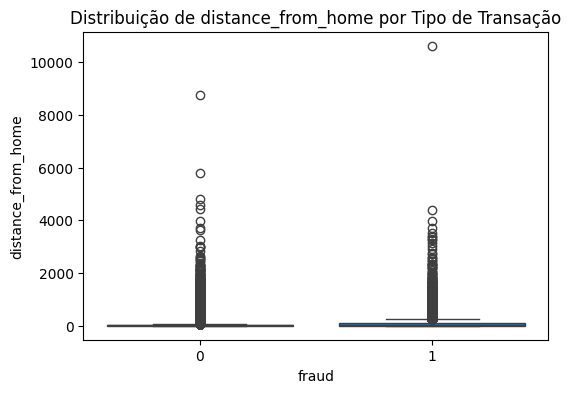

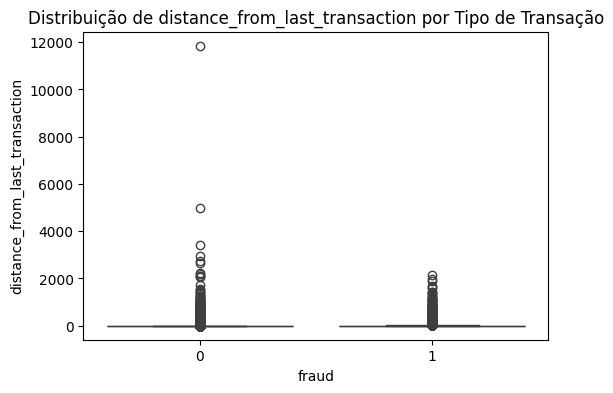

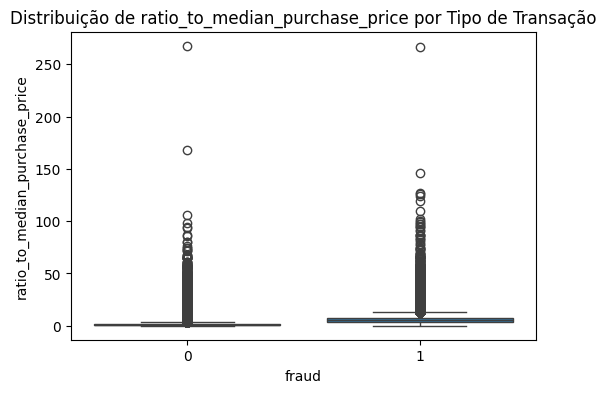

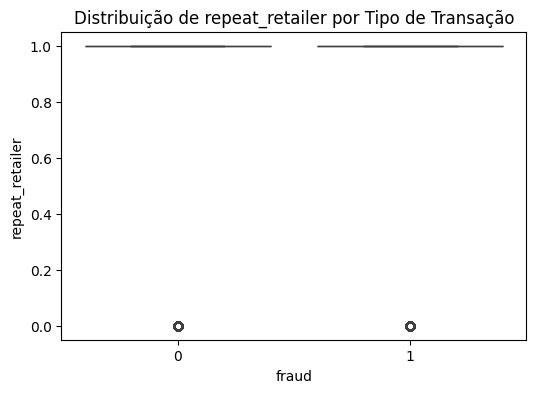

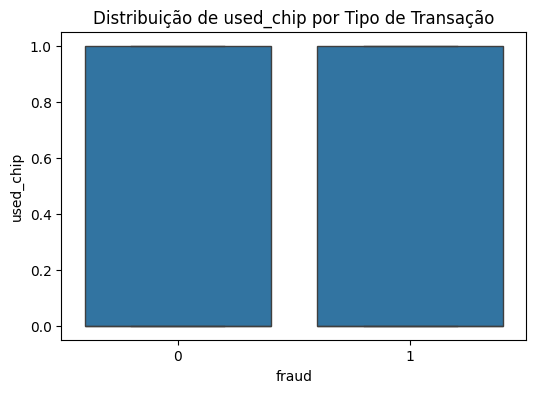

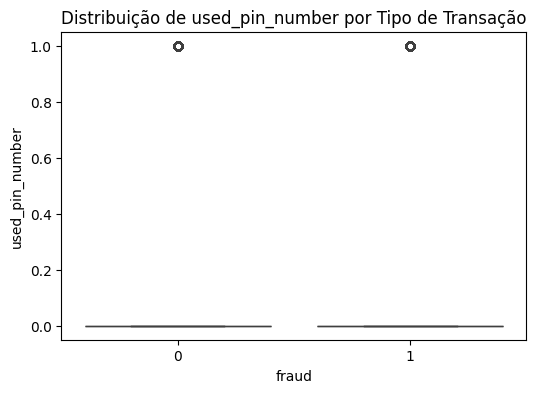

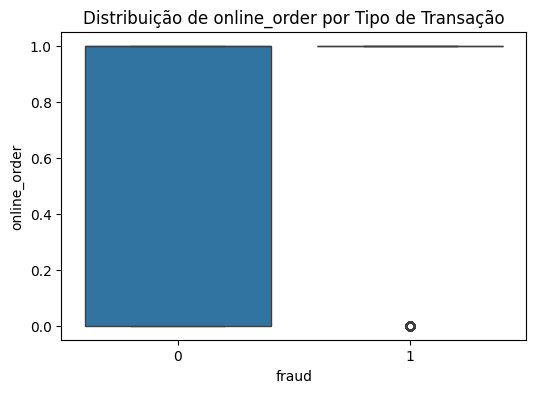

In [34]:
for col in df.columns[:-1]:  # Ignorando a coluna 'fraud'
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df["fraud"], y=df[col])
    plt.title(f"Distribuição de {col} por Tipo de Transação")
    plt.show()


## Modelo com arvore

In [46]:
# # 1️⃣ Carregar os dados
# X = df[['ratio_to_median_purchase_price', 'online_order', 'distance_from_home', 'distance_from_last_transaction', 'used_chip', 'used_pin_number']]
X = df[['ratio_to_median_purchase_price', 'online_order', 'distance_from_home']]
y = df['fraud']

In [47]:
# 2️⃣ Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# 3️⃣ Criar e treinar o modelo de Árvore de Decisão
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [49]:
# 4️⃣ Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [50]:
# 5️⃣ Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.97327

Matriz de Confusão:
 [[178806   3751]
 [  1595  15848]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99    182557
           1       0.81      0.91      0.86     17443

    accuracy                           0.97    200000
   macro avg       0.90      0.94      0.92    200000
weighted avg       0.98      0.97      0.97    200000



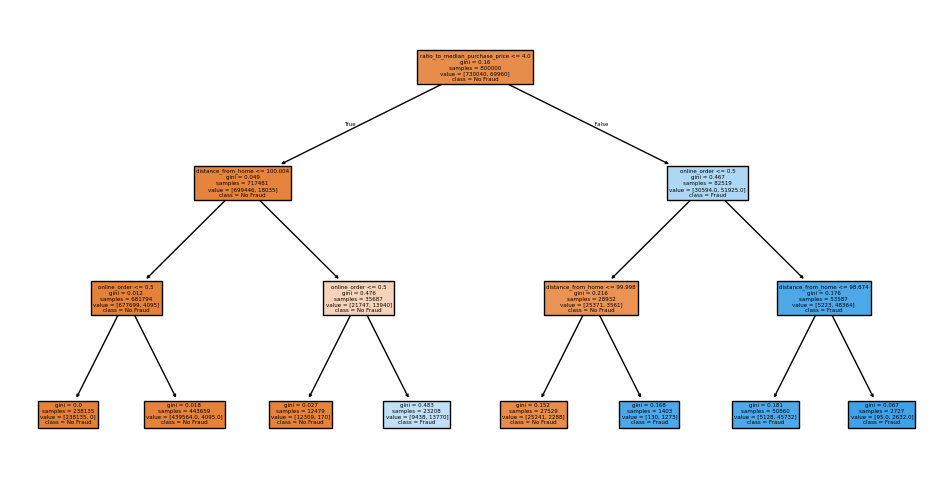

In [51]:
# 6️⃣ Visualizar a árvore de decisão
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=X.columns, class_names=['No Fraud', 'Fraud'], filled=True)
plt.show()

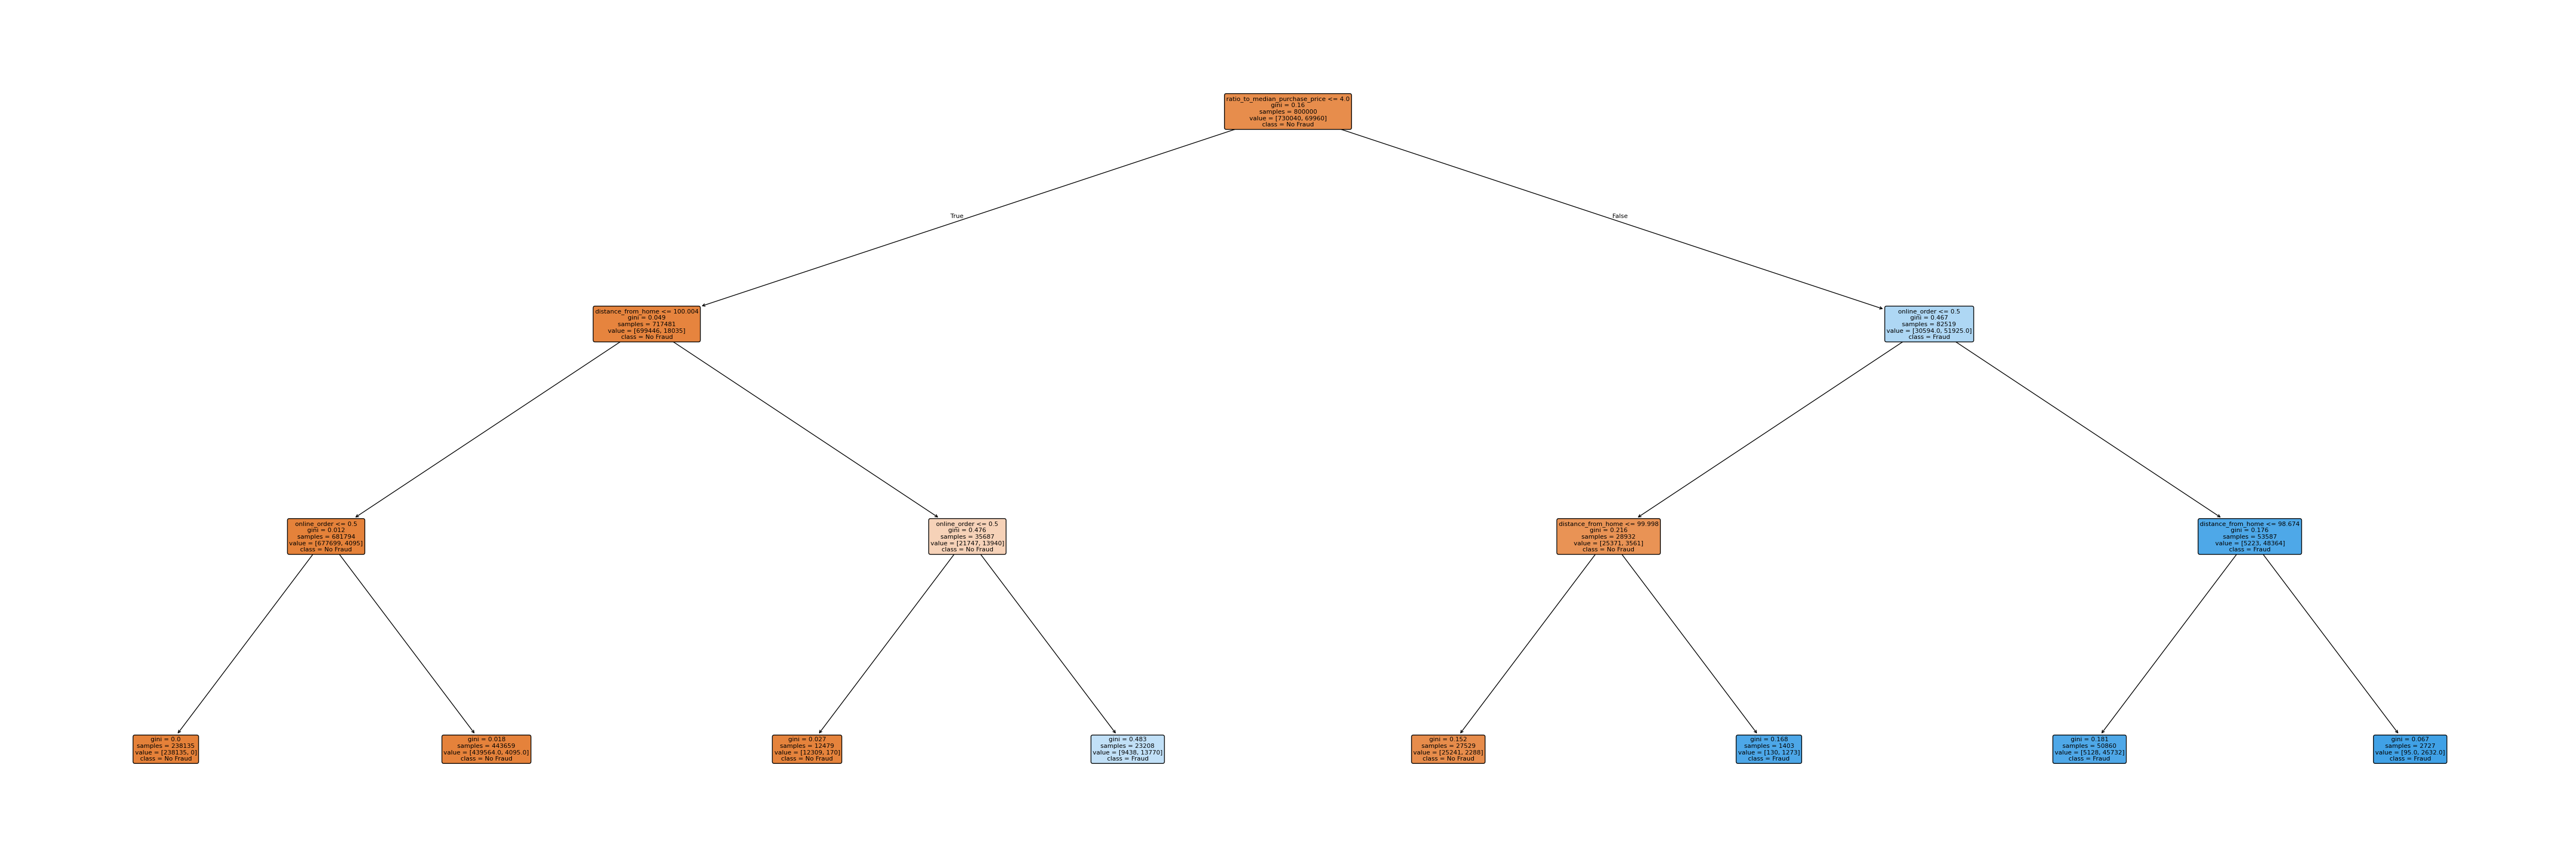

In [53]:
plt.figure(figsize=(60, 20))

# Plotar a árvore
plot_tree(model, 
          feature_names=X.columns, 
          class_names=['No Fraud', 'Fraud'], 
          filled=True, rounded=True, fontsize=8)

# Salvar a imagem
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')

# Exibir no Jupyter
plt.show()
